In [165]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import random as rd

from scipy.stats import kde

In [2]:
#Cleaning data
df=pd.read_csv("finalyay.csv")

In [3]:
df.describe()

,Unnamed: 0,Size (in inches),RAM (GB),Internal storage (GB),Battery capacity (mAh),Price (Rp)
count,732.000000,732.000000,732.000000,732.000000,732.000000,7.320000e+02
mean,366.500000,5.969262,5.048156,99.508197,3840.642077,7.207994e+06
std,211.454487,0.695066,2.848816,91.096489,1039.552883,7.114832e+06
min,1.000000,3.300000,0.500000,4.000000,800.000000,4.000000e+05
25%,183.750000,5.500000,3.000000,32.000000,3000.000000,2.425000e+06
50%,366.500000,6.100000,4.000000,64.000000,4000.000000,4.688000e+06
75%,549.250000,6.500000,6.000000,128.000000,4500.000000,9.812125e+06
max,732.000000,8.300000,18.000000,512.000000,8580.000000,5.570450e+07


In [4]:
df=df.drop("Unnamed: 0", axis=1)
df=df.drop("Name", axis=1)
df=df.drop("Device type", axis=1)

In [5]:
#get df with price<20000000
df=df[df["Price (Rp)"] < 20000000]

In [100]:
pd.DataFrame.to_csv(df, "IniFinalbanget.csv")

In [170]:
df=pd.read_csv("IniFinalbanget.csv")

In [6]:
colnames=df.columns

In [37]:
colnames

Index(['Brand', 'Size (in inches)', 'Resolution', 'Features', 'Processor',
       'GPU', 'RAM (GB)', 'Internal storage (GB)', 'OS',
       'Battery capacity (mAh)', 'Rear', 'Main camera', 'Video recording',
       'Front', 'Headphones', 'Speakers', 'Price (Rp)'],
      dtype='object')

In [171]:
numberofbrand=[]
for i in np.unique(df["Brand"].values):
     numberofbrand.append(len(df[df["Brand"]==i]))
     
merged=list(zip(np.unique(df["Brand"].values), numberofbrand))

merged.sort(key=lambda x:x[1], reverse=True)
name,val=list(zip(*merged))

In [179]:
brandandprice=df.iloc[:,[1,17]]

In [180]:
brandandprice

,Brand,Price (Rp)
0,Nothing,14669500.0
1,OnePlus,10500000.0
2,Asus,15500000.0
3,Nokia,2500000.0
4,Nokia,1000000.0
...,...,...
682,Asus,3500000.0
683,Asus,1124500.0
684,Acer,499000.0
685,Xiaomi,1577450.0


In [174]:
whatwegonnause=name[:9]
others=name[9:]

In [175]:
brandandprice[brandandprice["Brand"]=="Nothing"]

,Brand,Price (Rp)
0,Nothing,14669500.0
58,Nothing,12450000.0


In [188]:
#changing name to others
for i in others:
    brandandprice.iloc[brandandprice["Brand"]==i,0]="others"

In [190]:
tempbrandnames=np.unique(brandandprice["Brand"].values)
tempbrandnames

array(['Apple', 'Asus', 'Huawei', 'LG', 'Nokia', 'OPPO', 'Samsung',
       'Sony', 'Xiaomi', 'others'], dtype=object)

In [178]:
brandandprice

,Brand,Price (Rp)
0,others,others
1,others,others
2,Asus,15500000.0
3,Nokia,2500000.0
4,Nokia,1000000.0
...,...,...
682,Asus,3500000.0
683,Asus,1124500.0
684,others,others
685,Xiaomi,1577450.0


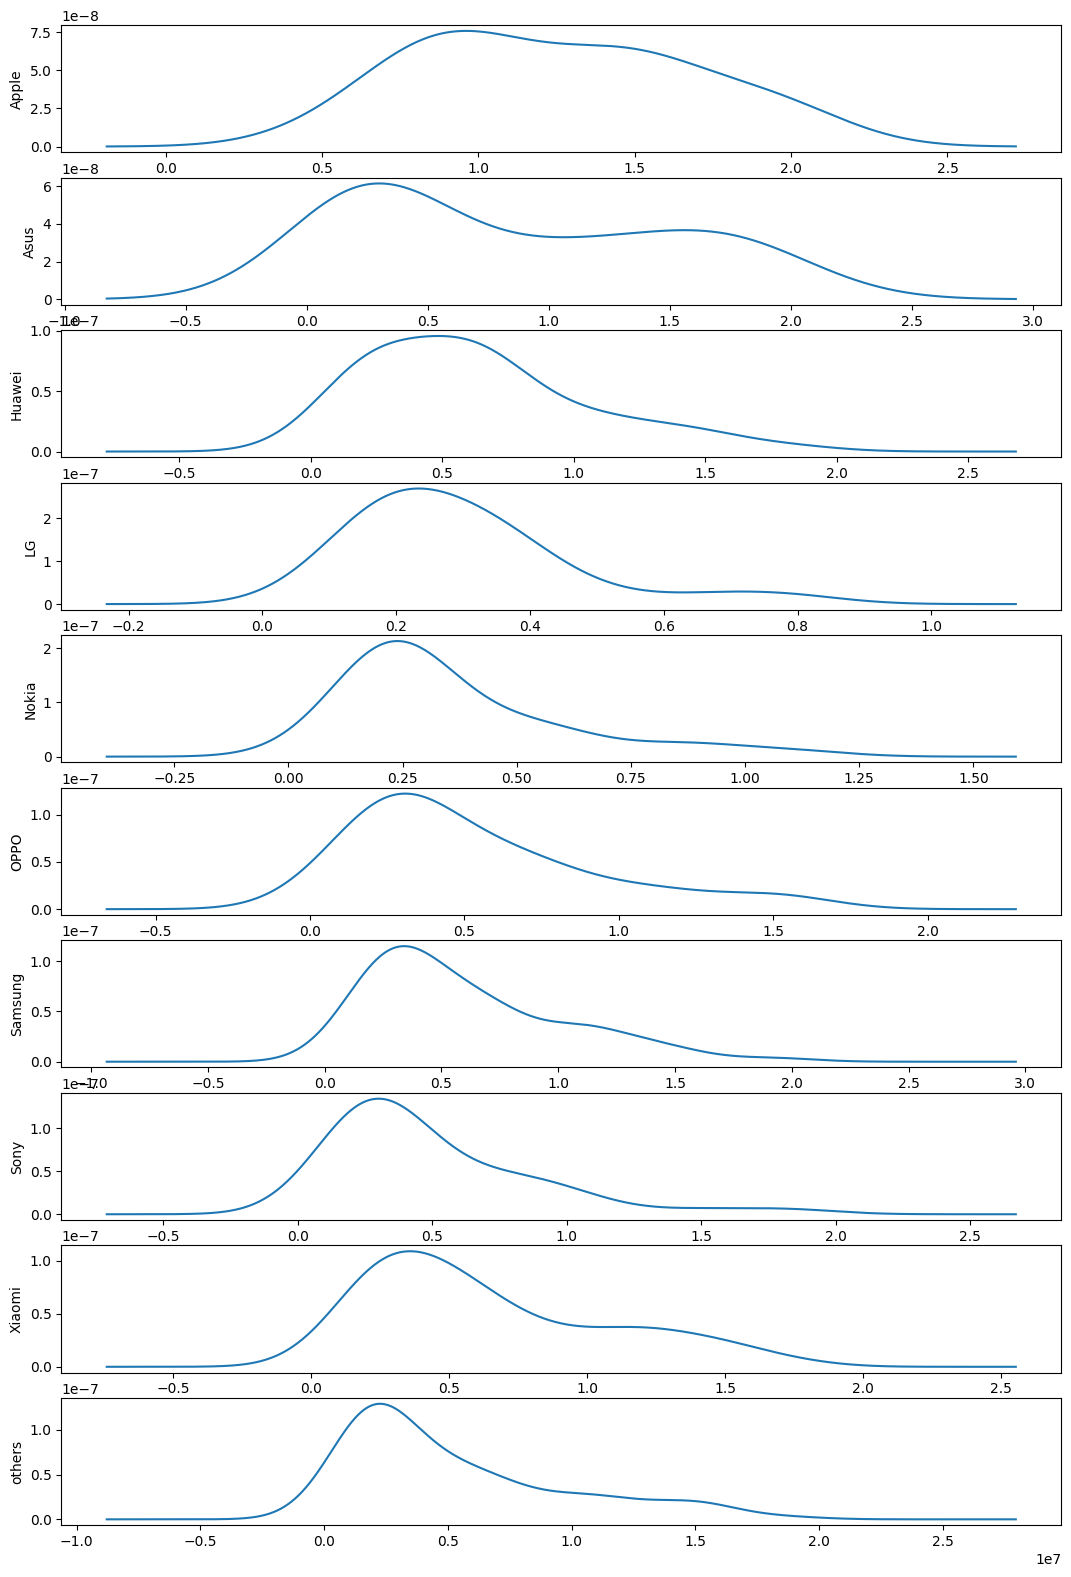

In [224]:
fig=plt.figure(figsize=(20,30))
fig.subplots_adjust(0,0,0.5,0.5,0.1)
counter=0
for tempbrandname in tempbrandnames:
    ax=fig.add_subplot(len(tempbrandnames),1, counter+1)
    iwannadie=(brandandprice[brandandprice["Brand"]==tempbrandname]).iloc[:,1]
    pd.Series(iwannadie).plot(kind='density')
    ax.set_ylabel(tempbrandname)
    counter+=1


In [13]:
categoric=[]
for i in colnames:
    if df[i].dtype=="object":
        categoric.append(i)

In [21]:
categoric

['Brand',
 'Resolution',
 'Features',
 'Processor',
 'GPU',
 'OS',
 'Rear',
 'Main camera',
 'Video recording',
 'Front',
 'Headphones',
 'Speakers']

In [27]:
data=df.iloc[:,:-1]
target=df.iloc[:,-1]

In [29]:
#Using encoder to handle categorical data
encoder=ce.OrdinalEncoder(cols=categoric)    #same  thing as label encoder but easier cuz fuck you
encoder.fit(data)
data=encoder.transform(data)

In [30]:
data

,Brand,Size (in inches),Resolution,Features,Processor,GPU,RAM (GB),Internal storage (GB),OS,Battery capacity (mAh),Rear,Main camera,Video recording,Front,Headphones,Speakers
0,1,6.7,1,1,1,1,8.0,128,1,4700,1,1,1,1,1,1
1,2,6.7,2,1,2,2,8.0,128,2,5000,2,1,2,2,1,1
2,3,5.9,3,1,3,3,8.0,128,2,4300,1,1,3,1,2,1
3,4,6.5,4,1,4,4,3.0,32,3,4000,2,2,4,3,2,2
4,4,6.3,5,1,5,5,3.0,32,3,3000,3,2,4,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,3,5.5,212,21,228,115,4.0,64,303,3000,9,102,104,4,2,2
728,3,5.5,235,21,229,115,4.0,64,304,3000,9,2,9,4,2,2
729,32,4.5,265,26,173,107,2.0,16,299,2000,3,87,9,92,2,3
730,6,4.7,259,21,183,92,1.0,8,305,2200,9,75,4,92,2,2


1
11
21
31
41
51
61
71
81
91


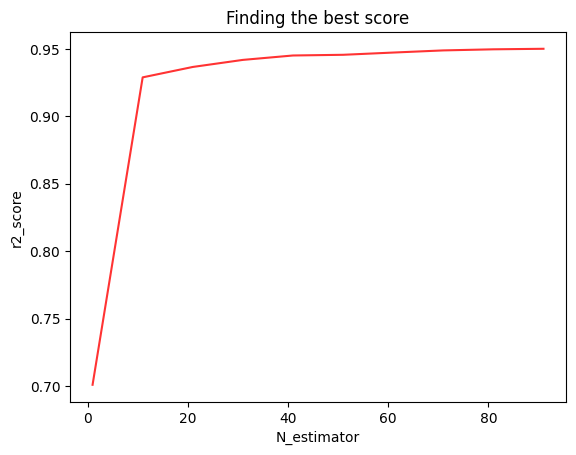

In [34]:
score=[];N=100
for i in range(1, N, 10):
    print(i)
    model=RandomForestRegressor(random_state=2324323, n_estimators=i)
    model.fit(data, target)
    predicted= model.predict(data)
    score.append(r2_score(target, predicted))
fig, ax = plt.subplots()
ax.plot([i for i in range(1,N,10)], score, color="red", alpha=0.8)
ax.set_title("Finding the best score");ax.set_xlabel("N_estimator");ax.set_ylabel("r2_score")
plt.show()

0.9492648682525968


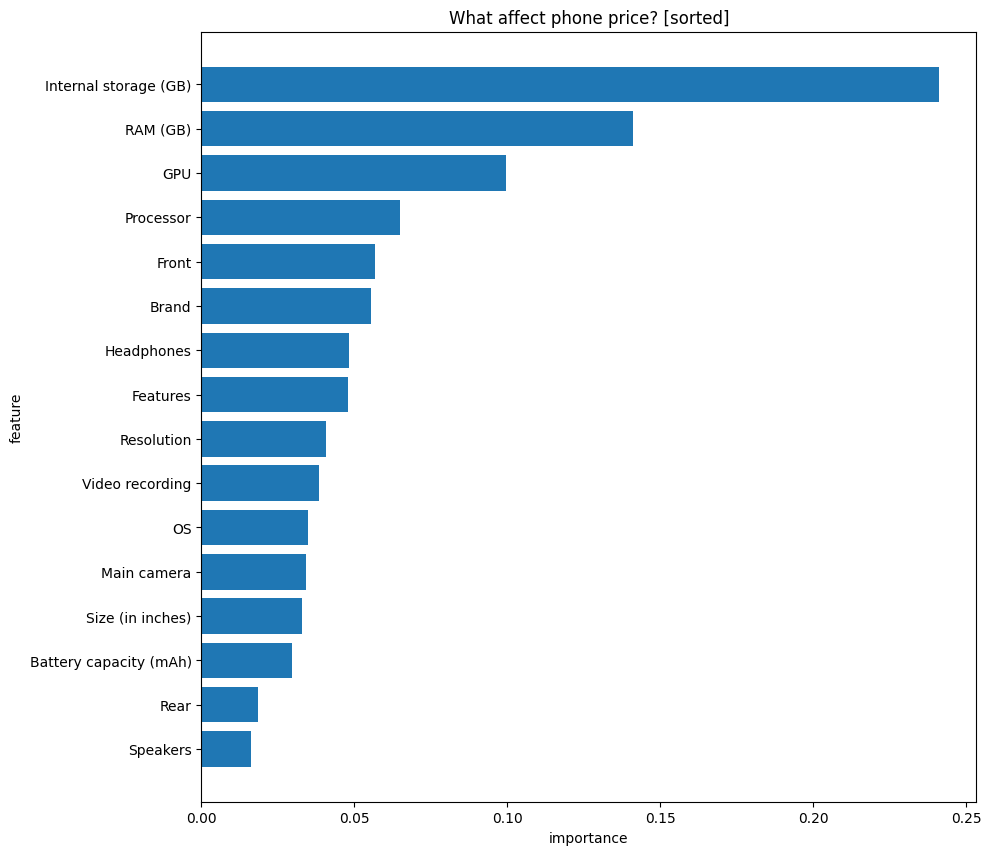

In [36]:
model=RandomForestRegressor(random_state=2324323, n_estimators=80)
model.fit(data, target)
predicted= model.predict(data)
print(r2_score(target, predicted))
fig, ax=plt.subplots(figsize=(10,10))

merged=list(zip(model.feature_names_in_, model.feature_importances_))
merged.sort(key=lambda x:x[1])
feature_names,importances=list(zip(*merged))
ax.barh(feature_names , importances)
ax.set_title("What affect phone price? [sorted]"); ax.set_xlabel("importance"); ax.set_ylabel("feature")
plt.show()

In [44]:
colnames

Index(['Brand', 'Size (in inches)', 'Resolution', 'Features', 'Processor',
       'GPU', 'RAM (GB)', 'Internal storage (GB)', 'OS',
       'Battery capacity (mAh)', 'Rear', 'Main camera', 'Video recording',
       'Front', 'Headphones', 'Speakers', 'Price (Rp)'],
      dtype='object')

In [102]:
#For predicting thing!?

def getrandomdata(size=1):
    returnthis=[]
    for i in range(size):
        yespapa=[]
        for colname in colnames[:-1]:
            randdata=rd.sample(list(df[colname].values),1 )[0]
            yespapa.append(randdata)
        returnthis.append(yespapa)
    return returnthis

def mamaiwannapredict(data):
    temp=pd.DataFrame(data, columns=colnames[:-1])
    temp=encoder.transform(temp)
    return model.predict(temp)


predictdata=getrandomdata(1)
print(predictdata)
print(mamaiwannapredict(predictdata))

[['Asus', 5.5, '2400 x 1080 pixels, 20:9 ratio, 395 PPI', 'Mass storage device, Charging', 'Octa-core, 1400 MHz, ARM Cortex-A53, 64-bit', 'Adreno 650', 4.0, 128, 'HarmonyOS 2', 4300, "Single camera', 'Camera samples", '13 MP (Sapphire crystal lens cover, OIS, Autofocus, BSI sensor)', '1920x1080 (Full HD)', '16 MP (HDR)', '3.5mm jack', 'Earpiece, Loudspeaker']]
[7235818.2375]


In [ ]:
d